In [1]:
import numpy as np
import pandas as pd
import pyspark as ps
import matplotlib.pyplot as plt
import csv

import unicodedata

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [2]:
columns = ['main', 'published', 'source_spam_probability', 'source_location', 'tags', 'lang', 'sentiment',
                   'author_gender', 'source_followers', 'source_following']

In [3]:
df = pd.read_json('reduced_tweets.json', lines=True)

In [4]:
df['published'] = pd.to_datetime(df['published'])

0   2016-01-01 00:30:04
1   2016-01-01 12:12:33
2   2016-01-01 19:52:15
3   2016-01-01 11:58:03
4   2016-01-01 06:17:28
Name: published, dtype: datetime64[ns]

In [99]:
def display_time(df):
    publishing_time = df['published'].map(lambda x: x.hour).value_counts() / df['published'].count()
    publishing_time.sort_index(inplace=True)
    publishing_time.plot(kind='bar')
    plt.show()

In [98]:
df['published'].count()

3812275

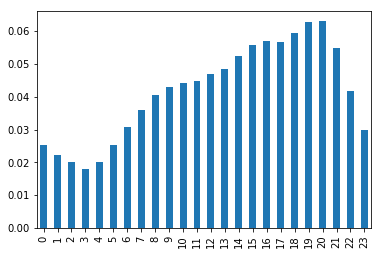

In [100]:
display_time(df[df.lang == 'en'])

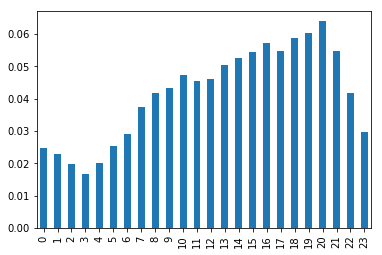

In [101]:
display_time(english_filtered)

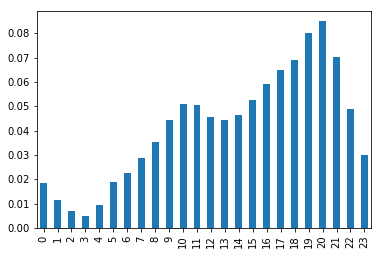

In [103]:
display_time(df[df.lang == 'fr'])

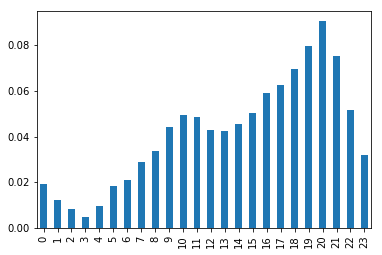

In [102]:
display_time(french_filtered)

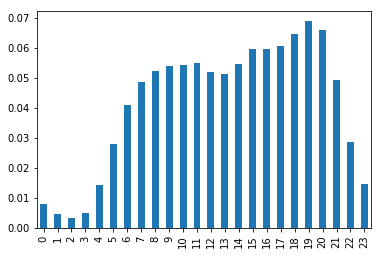

In [104]:
display_time(df[df.lang == 'de'])

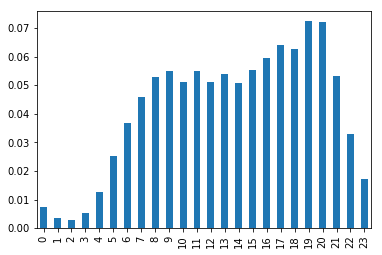

In [105]:
display_time(german_filtered)

Different languages have different pattern but no difference betweet mental illness related tweets and unrelated tweets can be found

In [5]:
df['main'] = df['main'].astype(str).str.lower().\
                    apply(lambda tweet: unicodedata.normalize('NFD', tweet).\
                    encode('ascii', 'ignore').decode('utf-8'))
df['main'] = df['main'].str.replace(r'[^\w\s]', '')
df['main'].head()

0    en esperant que 2016 soit meilleur que 2015 qu...
1                            nice bmw he kills ant s  
2      ich hab nichts dagegen wenn mir andere beim ...
3    happy new jear i am back from 2 weeks cuba let...
4      bonne annee a toi je prends beaucoup de plai...
Name: main, dtype: object

In [6]:
df[(df.main.str.contains('diagnosed')) & (df.main.str.contains('depression'))]['main']

1625479      i suffer from crippling depression and i am ...
Name: main, dtype: object

In [7]:
pd.set_option('display.max_colwidth', -1)
df[(df.main.str.contains('maladie mentale')) | (df.main.str.contains('trouble psychique')) \
   | (df.main.str.contains('trouble mentaux'))].count()

author_gender              16
lang                       16
main                       16
published                  16
sentiment                  16
source_followers           16
source_following           16
source_location            16
source_spam_probability    16
tags                       1 
dtype: int64

In [8]:
df[(df.main.str.contains(' xanax '))]

,author_gender,lang,main,published,sentiment,source_followers,source_following,source_location,source_spam_probability,tags
310696,UNKNOWN,fr,si je bouffe du xanax maintenant il ce passe quoi,2016-10-03 17:40:46,NEUTRAL,292,225,Genève,0,NaN
438786,UNKNOWN,en,and i get these panic attackspop a xanax relax trying to stick my fucking dick inside a mannequins ass eminem,2016-02-05 21:03:16,NEUTRAL,68,150,Monthey,0,NaN
662823,FEMALE,en,no insomnia no xanax for one month and put back 2kg feel so clean and healthy and both these things great news for upcoming aya diet eek,2016-02-07 08:44:38,NEUTRAL,66,78,Switzerland,0,NaN
749839,UNKNOWN,fr,ahaha cest tes xanax qui sont pas srx ouais,2016-10-07 00:57:34,NEUTRAL,294,235,Lausanne,0,NaN
978731,UNKNOWN,de,also xanax oder alk wirkt immer und sonst einfach mal versuchen mit nem freund aus der klasse ein gesprach anfangen,2016-09-09 05:51:13,NEUTRAL,27,81,"Schweiz, Schaffhausen",0,NaN
1011170,MALE,en,i need a one month vacation and a pack of xanax cause i give zero fucks and got zero chill in me,2016-10-09 17:47:39,NEGATIVE,656,660,"Zürich, Switzerland",0,NaN
1043729,MALE,fr,le xanax est une vraie saloperie mieux vaut prendre des choses plus naturelles surtout a ton age,2016-05-10 19:21:51,NEUTRAL,-1,0,NaN,0,NaN
1633619,UNKNOWN,fr,le xanax pourrait vous aider,2016-10-14 15:53:08,NEUTRAL,9,72,geneva,0,NaN
1702062,UNKNOWN,fr,rien de mieux quun xanax pour terminer ce cocktail de sante,2016-08-15 03:41:50,NEUTRAL,292,225,Genève,0,NaN
1790677,FEMALE,en,if i wasnt pumped full of xanax for my fear of flying i would have probably yelled i love your music runs away,2016-05-16 09:27:42,NEUTRAL,218,83,Switzerland,0,NaN


In [9]:
df['split'] = df['main'].str.split()
df.head()

,author_gender,lang,main,published,sentiment,source_followers,source_following,source_location,source_spam_probability,tags,split
0,FEMALE,fr,en esperant que 2016 soit meilleur que 2015 quand meme,2016-01-01 00:30:04,NEUTRAL,80,140,Saint-Maurice,0,NaN,"[en, esperant, que, 2016, soit, meilleur, que, 2015, quand, meme]"
1,UNKNOWN,en,nice bmw he kills ant s,2016-01-01 12:12:33,NEUTRAL,79,196,Hinwil,0,NaN,"[nice, bmw, he, kills, ant, s]"
2,MALE,de,ich hab nichts dagegen wenn mir andere beim saufen zuschauen solange sie pro minute 5 zahlen,2016-01-01 19:52:15,NEUTRAL,479,783,Schenkon,0,NaN,"[ich, hab, nichts, dagegen, wenn, mir, andere, beim, saufen, zuschauen, solange, sie, pro, minute, 5, zahlen]"
3,UNKNOWN,en,happy new jear i am back from 2 weeks cuba let s go into the 2016,2016-01-01 11:58:03,NEUTRAL,79,196,Hinwil,0,NaN,"[happy, new, jear, i, am, back, from, 2, weeks, cuba, let, s, go, into, the, 2016]"
4,UNKNOWN,fr,bonne annee a toi je prends beaucoup de plaisir a suivre tes videos je suis un grand fande tour de france merci continue ainsi,2016-01-01 06:17:28,NEUTRAL,75,984,Bâle,0,NaN,"[bonne, annee, a, toi, je, prends, beaucoup, de, plaisir, a, suivre, tes, videos, je, suis, un, grand, fande, tour, de, france, merci, continue, ainsi]"


In [10]:
def remove_stops(language, cleaned, frame):
    lang = language[:2]
    if language == 'german':
        lang = 'de'
    lang_set = stopwords.words(language)
    cleaned.loc[cleaned['lang'] == lang, frame] = cleaned.loc[cleaned['lang'] == lang, frame].\
        apply(lambda tweet: [word for word in tweet if word not in lang_set])

In [11]:
remove_stops('english', df, 'split')
remove_stops('french', df, 'split')
remove_stops('german', df, 'split')

In [12]:
df.head()

,author_gender,lang,main,published,sentiment,source_followers,source_following,source_location,source_spam_probability,tags,split
0,FEMALE,fr,en esperant que 2016 soit meilleur que 2015 quand meme,2016-01-01 00:30:04,NEUTRAL,80,140,Saint-Maurice,0,NaN,"[esperant, 2016, meilleur, 2015, quand, meme]"
1,UNKNOWN,en,nice bmw he kills ant s,2016-01-01 12:12:33,NEUTRAL,79,196,Hinwil,0,NaN,"[nice, bmw, kills, ant]"
2,MALE,de,ich hab nichts dagegen wenn mir andere beim saufen zuschauen solange sie pro minute 5 zahlen,2016-01-01 19:52:15,NEUTRAL,479,783,Schenkon,0,NaN,"[dagegen, beim, saufen, zuschauen, solange, pro, minute, 5, zahlen]"
3,UNKNOWN,en,happy new jear i am back from 2 weeks cuba let s go into the 2016,2016-01-01 11:58:03,NEUTRAL,79,196,Hinwil,0,NaN,"[happy, new, jear, back, 2, weeks, cuba, let, go, 2016]"
4,UNKNOWN,fr,bonne annee a toi je prends beaucoup de plaisir a suivre tes videos je suis un grand fande tour de france merci continue ainsi,2016-01-01 06:17:28,NEUTRAL,75,984,Bâle,0,NaN,"[bonne, annee, a, prends, beaucoup, plaisir, a, suivre, videos, grand, fande, tour, france, merci, continue, ainsi]"


In [13]:
def stem_words(language, cleaned, frame):
    lang = language[:2]
    if language == 'german':
        lang = 'de'
    
    stemmer = SnowballStemmer(language)
        
    cleaned.loc[cleaned['lang'] == lang, frame] = cleaned.loc[cleaned['lang'] == lang, frame].\
        apply(lambda tweet: [stemmer.stem(word) for word in tweet])

In [14]:
stem_words('english', df, 'split')
stem_words('french', df, 'split')
stem_words('german', df, 'split')

In [15]:
DICT_PATH = "dictionary.csv"
dictionaries = pd.read_csv(DICT_PATH)
dictionaries.head()

,english,french,german,swiss_german
0,abusive,abusif,missbrauch,NaN
1,addict,accro,sucht,NaN
2,afraid,peur,angst,angscht
3,agoraphobe,agoraphobe,NaN,NaN
4,agoraphobia,agoraphobie,NaN,NaN


In [16]:
en_dict = dictionaries['english'].dropna()
fr_dict = dictionaries['french'].dropna()
de_dict = pd.concat([dictionaries['german'].dropna(), dictionaries['swiss_german'].dropna()])

In [17]:
def dict_cleaning(lang):
    lang_dict = eval(lang + '_dict')
    lang_dict = lang_dict.astype(str).str.lower().\
                        apply(lambda expression: unicodedata.normalize('NFD', expression).\
                        encode('ascii', 'ignore').decode('utf-8'))

In [18]:
dict_cleaning('en')
dict_cleaning('fr')
dict_cleaning('de')

In [19]:
#Tokenizing
en_dict = en_dict.str.split()
fr_dict = fr_dict.str.split()
de_dict = de_dict.str.split()

In [20]:
def dict_remove_stops(language):
    lang = language[:2]
    if language == 'german':
        lang = 'de'
    
    lang_dict = eval(lang + '_dict')
    lang_set = stopwords.words(language)
        
    lang_dict = lang_dict.apply(lambda expression: [word for word in expression if word not in lang_set])

In [21]:
#Removing stop words
dict_remove_stops('english')
dict_remove_stops('french')
dict_remove_stops('german')

In [22]:
def dict_stem_words(language):
    lang = language[:2]
    if language == 'german':
        lang = 'de'
    
    lang_dict = eval(lang + '_dict')
    stemmer = SnowballStemmer(language)
        
    lang_dict = lang_dict.apply(lambda expression: [stemmer.stem(word) for word in expression])

In [23]:
#Stemming the words
dict_stem_words('english')
dict_stem_words('french')
dict_stem_words('german')

In [24]:
df['merged'] = df.split.map(lambda x:  ' '.join(x))
de_dict = de_dict.map(lambda x:  ' '.join(x))
en_dict = en_dict.map(lambda x:  ' '.join(x))
fr_dict = fr_dict.map(lambda x:  ' '.join(x))

In [25]:
def check_dict(tweet, dict_):
    """checks if dict entry matches tweet"""
    match = [ w for w in dict_ if w in tweet] #find matching for each entry
    return len(match) > 0 #at least one match

In [26]:
english_filtered = df[df.lang == 'en'][df[df.lang == 'en']['merged'].map(lambda x: check_dict(x, en_dict))]
english_filtered.head()

,author_gender,lang,main,published,sentiment,source_followers,source_following,source_location,source_spam_probability,tags,split,merged
210,UNKNOWN,en,i feel sad that they have to hide and probably wont ever be able to go out and have fun like a normal couple,2016-01-01 15:38:09,NEGATIVE,598,316,Svizzera,0,NaN,"[feel, sad, hide, probabl, wont, ever, abl, go, fun, like, normal, coupl]",feel sad hide probabl wont ever abl go fun like normal coupl
279,UNKNOWN,en,it become a scandal like if dating someone is wrongand they may loose fansor getting hate from other fandomsthey are humans,2016-01-01 15:37:17,NEUTRAL,598,316,Svizzera,0,NaN,"[becom, scandal, like, date, someon, wrongand, may, loos, fansor, get, hate, fandomsthey, human]",becom scandal like date someon wrongand may loos fansor get hate fandomsthey human
314,UNKNOWN,en,i hope he will take care of my girl dont hurt her huh,2016-01-01 12:33:29,NEUTRAL,598,316,Svizzera,0,NaN,"[hope, take, care, girl, dont, hurt, huh]",hope take care girl dont hurt huh
316,UNKNOWN,en,i hope people will react positively but im afraid about his fangirls,2016-01-01 12:41:23,NEUTRAL,598,316,Svizzera,0,NaN,"[hope, peopl, react, posit, im, afraid, fangirl]",hope peopl react posit im afraid fangirl
349,UNKNOWN,en,but hanis dating news makes me feel sad because its not normal that idols have to hide their relationship and when someone discover it,2016-01-01 15:36:24,NEUTRAL,598,316,Svizzera,0,NaN,"[hani, date, news, make, feel, sad, normal, idol, hide, relationship, someon, discov]",hani date news make feel sad normal idol hide relationship someon discov


In [ ]:
english_filtered.count()

In [ ]:
len(french_filtered)

In [ ]:
len(german_filtered)

In [74]:
depression_french = df[df.main.str.contains(' ma ') & df.main.str.contains('depression')]

In [75]:
depression_french

,author_gender,lang,main,published,sentiment,source_followers,source_following,source_location,source_spam_probability,tags,split,merged
32272,UNKNOWN,fr,firefox qui veut me sortir de ma depression cest chou mais un peu arrogant,2016-04-01 15:38:14,NEUTRAL,349,318,Switzerland,0,NaN,"[firefox, veut, sort, depress, cest, chou, peu, arrog]",firefox veut sort depress cest chou peu arrog
199496,MALE,fr,bonjour je mappelle patrick et ma carte visa est en pleine depression,2016-09-02 18:17:55,NEUTRAL,47300,21000,"Geneve, Switzerland",0,NaN,"[bonjour, mappel, patrick, cart, vis, plein, depress]",bonjour mappel patrick cart vis plein depress
228924,FEMALE,fr,la meuf dans ma classe qui me parle h24 de sa vie et de sa depressionje sais que cest difficile mais ptn jsuis pas psy quoi merde,2016-01-03 16:35:36,NEUTRAL,1083,226,Suisse,0,NaN,"[meuf, class, parl, h24, vi, depressionj, sais, cest, difficil, ptn, jsuis, psy, quoi, merd]",meuf class parl h24 vi depressionj sais cest difficil ptn jsuis psy quoi merd
229057,UNKNOWN,fr,heureusement que demain cest pas la rentree sinon ca serait la plus grosse depression de ma vie,2016-01-03 12:29:33,NEUTRAL,296,287,Schweiz,0,NaN,"[heureux, demain, cest, rentre, sinon, ca, plus, gross, depress, vi]",heureux demain cest rentre sinon ca plus gross depress vi
255673,UNKNOWN,fr,mdrr ma mere vien de mappeler en face time et y avais ma famille ils on rajouter une couche a ma depression,2016-04-03 10:04:59,NEUTRAL,177,329,Suisse,0,NaN,"[mdrr, mer, vien, mappel, fac, tim, famill, il, rajout, couch, a, depress]",mdrr mer vien mappel fac tim famill il rajout couch a depress
582922,UNKNOWN,fr,gahahaha merci de maider dans ma depression,2016-06-06 16:34:37,NEUTRAL,451,204,Genève,0,NaN,"[gahahah, merc, maid, depress]",gahahah merc maid depress
733749,UNKNOWN,fr,la depression en voyant quil est que 630 et le declic quand je me rappelle que dans ma tete il est 730,2016-09-07 05:38:00,NEUTRAL,528,467,Switzerland,0,NaN,"[depress, voi, quil, 630, declic, quand, rappel, tet, 730]",depress voi quil 630 declic quand rappel tet 730
880851,UNKNOWN,fr,jme souviens que jai trop bader sur ma life hier limite jetais en depression,2016-10-08 09:52:03,NEUTRAL,757,721,"conthey, valais, suisse",0,NaN,"[jme, souvien, jai, trop, bad, lif, hi, limit, jet, depress]",jme souvien jai trop bad lif hi limit jet depress
1006434,FEMALE,fr,sils se separent vous aurez ma depression sur la conscience tseu,2016-10-09 11:59:12,NEUTRAL,401,555,"Valais, Suisse",0,NaN,"[sil, separent, depress, conscienc, tseu]",sil separent depress conscienc tseu
1248038,UNKNOWN,fr,mais on va pas faire de throwback sur ma depression de trois jours quand jai cru que jallais le rembourser a 20 jours de noel,2016-10-11 11:47:19,NEUTRAL,2412,204,"lausanne, california state",0,NaN,"[va, fair, throwback, depress, trois, jour, quand, jai, cru, jall, rembours, a, 20, jour, noel]",va fair throwback depress trois jour quand jai cru jall rembours a 20 jour noel


In [ ]:
#english_filtered.to_csv('english.csv')

In [ ]:
#english_filtered.sample(n=1000).to_csv('english_1000.csv')

In [70]:
french_filtered = df[df.lang == 'fr'][df[df.lang == 'fr']['split'].map(lambda x: check_dict(x, fr_dict))]
french_filtered.head()

,author_gender,lang,main,published,sentiment,source_followers,source_following,source_location,source_spam_probability,tags,split,merged
330,UNKNOWN,fr,suis je le seul debout,2016-01-01 11:06:40,NEUTRAL,276,241,Fribourg,0,NaN,"[seul, debout]",seul debout
343,UNKNOWN,fr,je crois je vais allez regarder les feu dartifices toute seule au bord de leau,2016-01-01 02:19:52,NEUTRAL,275,632,Geneve,0,NaN,"[crois, vais, allez, regard, le, feu, dartific, tout, seul, bord, leau]",crois vais allez regard le feu dartific tout seul bord leau
669,UNKNOWN,fr,je rigole encore tout seul dans ma chambre dhier,2016-01-01 14:08:50,NEUTRAL,128,93,Lausanne,0,NaN,"[rigol, encor, tout, seul, chambr, dhi]",rigol encor tout seul chambr dhi
686,UNKNOWN,fr,vecu cest surement la seule chose de ma vie au sujet de laquelle je suis certain de dire toujours bonne annee a toi,2016-01-01 09:42:47,NEUTRAL,327,289,Lausanne,0,NaN,"[vecu, cest, sur, seul, chos, vi, sujet, laquel, certain, dir, toujour, bon, anne, a]",vecu cest sur seul chos vi sujet laquel certain dir toujour bon anne a
691,UNKNOWN,fr,pas mais qui dureront aussi longtemps que nous jen ai aussi je les tais par peur pudeur paresse mais elles sont la,2016-01-01 09:34:43,NEUTRAL,327,289,Lausanne,0,NaN,"[dur, auss, longtemp, jen, auss, le, tais, peur, pudeur, paress, elle]",dur auss longtemp jen auss le tais peur pudeur paress elle


In [ ]:
#french_filtered.sample(n=1000).to_csv('french_1000.csv')

In [50]:
german_filtered = df[df.lang == 'de'][df[df.lang == 'de']['split'].map(lambda x: check_dict(x, de_dict))]
german_filtered.head()

,author_gender,lang,main,published,sentiment,source_followers,source_following,source_location,source_spam_probability,tags,split,merged
65,MALE,de,rtl bringt das kunststuck fertig eine klassische pleitenpechundpannensendung in den sand zu setzen soviel zur angst vor privaten,2016-01-01 19:35:15,NEUTRAL,479,783,Schenkon,0,NaN,"[rtl, bringt, kunststuck, fertig, klassisch, pleitenpechundpannensend, sand, setz, soviel, angst, privat]",rtl bringt kunststuck fertig klassisch pleitenpechundpannensend sand setz soviel angst privat
426,MALE,de,das war er nun der schlechteste tatort ever,2016-01-01 20:47:49,NEUTRAL,514,944,St. Gallen,0,[Tatort],"[schlecht, tatort, ever]",schlecht tatort ever
558,UNKNOWN,de,nei nei keine angst ich reise nicht mehr gerne,2016-01-01 21:53:17,NEUTRAL,38400,36900,CH,0,NaN,"[nei, nei, angst, reis, mehr, gern]",nei nei angst reis mehr gern
786,UNKNOWN,de,aber es geht ihr wieder besser trotzdem sie wird nie wieder die alte sein das macht mich traurig,2016-01-01 21:04:23,NEUTRAL,20,53,Bern,0,NaN,"[geht, bess, trotzd, nie, alt, macht, traurig]",geht bess trotzd nie alt macht traurig
796,FEMALE,de,ja wohlwollend meinten die anderen rose aber nur weil ich so traurig war dass wir immer ein spermium rauskam,2016-01-01 01:52:09,NEUTRAL,1497,281,Bern,0,NaN,"[ja, wohlwoll, meint, ros, traurig, dass, imm, spermium, rauskam]",ja wohlwoll meint ros traurig dass imm spermium rauskam


In [27]:
from gensim import corpora, models

In [28]:
dictionary = corpora.Dictionary(english_filtered.split)

In [29]:
dictionary.filter_extremes(no_below=5, no_above=.5)

In [30]:
print(dictionary)

Dictionary(8765 unique tokens: ['feel', 'sad', 'hide', 'probabl', 'wont']...)


In [108]:
texts = english_filtered.split.tolist()

In [109]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [110]:
ldamodel_2 = models.LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers=3)

In [111]:
ldamodel_2.show_topics()

[(0,
  '0.021*"get" + 0.016*"pain" + 0.014*"whatev" + 0.014*"hurt" + 0.013*"cover" + 0.011*"dont" + 0.011*"im" + 0.008*"cant" + 0.008*"sad" + 0.007*"afraid"'),
 (1,
  '0.012*"hate" + 0.010*"hater" + 0.010*"govern" + 0.010*"download" + 0.006*"say" + 0.005*"gonna" + 0.005*"get" + 0.005*"app" + 0.005*"im" + 0.005*"stress"'),
 (2,
  '0.017*"hurt" + 0.012*"pain" + 0.010*"paint" + 0.010*"see" + 0.008*"sad" + 0.008*"feel" + 0.008*"get" + 0.007*"im" + 0.007*"like" + 0.007*"realli"'),
 (3,
  '0.025*"stress" + 0.015*"hate" + 0.012*"govern" + 0.012*"dont" + 0.008*"time" + 0.008*"pain" + 0.007*"play" + 0.007*"ambassador" + 0.006*"poverti" + 0.006*"peopl"'),
 (4,
  '0.118*"hate" + 0.017*"peopl" + 0.015*"u" + 0.014*"dont" + 0.014*"love" + 0.012*"like" + 0.012*"much" + 0.011*"sad" + 0.010*"fuck" + 0.008*"realli"'),
 (5,
  '0.020*"assad" + 0.019*"syria" + 0.014*"im" + 0.012*"go" + 0.008*"make" + 0.007*"sad" + 0.006*"dont" + 0.006*"hurt" + 0.006*"want" + 0.005*"year"'),
 (6,
  '0.011*"belong" + 0.010*"

In [112]:
import pyLDAvis.gensim

vis_data = pyLDAvis.gensim.prepare(ldamodel_2, corpus, dictionary)

/Users/lguillain/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]


In [113]:
pyLDAvis.display(vis_data)

In [115]:
fr_dictionary = corpora.Dictionary(french_filtered.split)
fr_dictionary.filter_extremes(no_below=5, no_above=.3)
fr_texts = french_filtered.split.tolist()
fr_corpus = [fr_dictionary.doc2bow(text) for text in fr_texts]

ldamodel_2 = models.LdaMulticore(fr_corpus, id2word=fr_dictionary, num_topics=2, workers=3, iterations=100, passes=20)

vis_data = pyLDAvis.gensim.prepare(ldamodel_2, fr_corpus, fr_dictionary)

pyLDAvis.display(vis_data)

/Users/lguillain/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]


In [73]:
ger_dictionary = corpora.Dictionary(german_filtered.split)
ger_dictionary.filter_extremes(no_below=5, no_above=.5)
ger_texts = german_filtered.split.tolist()
ger_corpus = [ger_dictionary.doc2bow(text) for text in ger_texts]

ldamodel_2 = models.LdaMulticore(ger_corpus, id2word=ger_dictionary, num_topics=20, workers=3)

vis_data = pyLDAvis.gensim.prepare(ldamodel_2, ger_corpus, ger_dictionary)

pyLDAvis.display(vis_data)

/Users/lguillain/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]
